In [1]:
import os
import sys
import numpy as np
import h5py as h5
import glob

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 
#import spec_helper_functions as shf

sys.path.append('../analysis')
import spectrum_analysis_tools as spa
import imp


import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

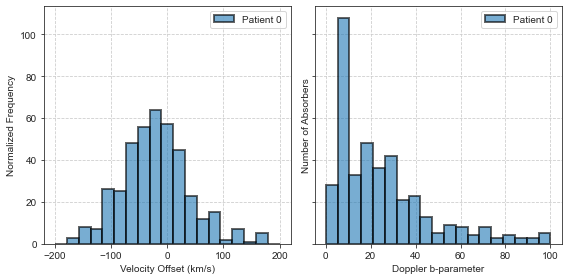

In [18]:
fn = '../../data/analyzed_spectra/combined_spectra.h5'

model = 'P0'
vel = pt.load_data(['vel'], fn = fn)
vel_p0 = pt.load_data(['vel'], model = model, fn = fn)

vel = vel[vel > -1000]
vel_p0 = vel_p0[vel_p0 > -1000]

bval = pt.load_data(['bval'], fn = fn)
bval_p0 = pt.load_data(['bval'], model = model, fn = fn)

bval = bval[bval > -1000]
bval_p0 = bval_p0[bval_p0 > -1000]


fig, ax = plt.subplots(nrows =1, ncols =2, figsize =(8, 4), sharey = True, sharex= False)
lw = 2
ht = 'stepfilled'
ht = 'bar'
dens = False
nbin = np.linspace(-200, 200, 20)
ec = 'black'
alpha = 0.6

ax[0].hist(vel_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[0].hist(vel_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[0].legend()
ax[0].set_ylabel('Normalized Frequency')
ax[0].set_xlabel('Velocity Offset (km/s)')

nbin = np.linspace(0, 100, 20)
ax[1].hist(bval_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[1].hist(bval_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[1].legend()
ax[1].set_ylabel('Number of Absorbers')
ax[1].set_xlabel('Doppler b-parameter')

fig.tight_layout()
plt.savefig('../../plots/vel_bval_histogram_%s.png'%model, dpi = 300)

/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/plotting/plotting_tools.py:100: RuntimeWarning: overflow encountered in power
  yerr = 10**yerr


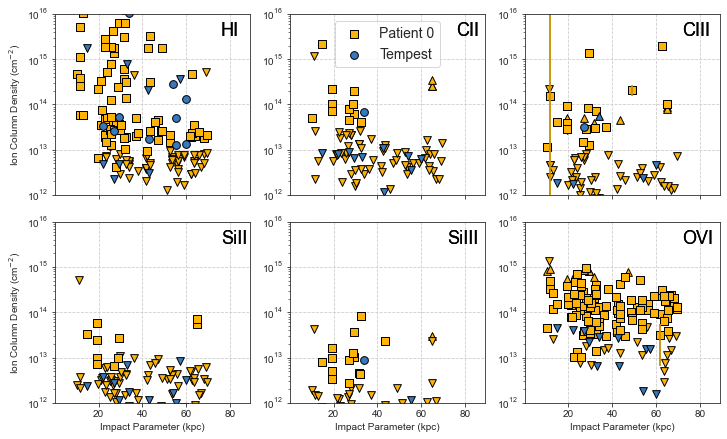

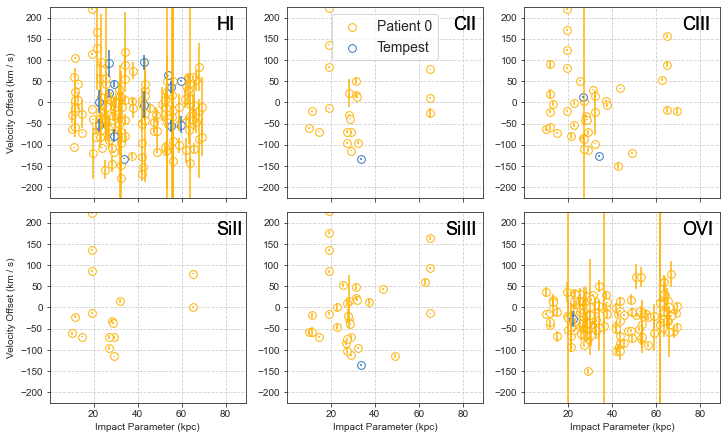

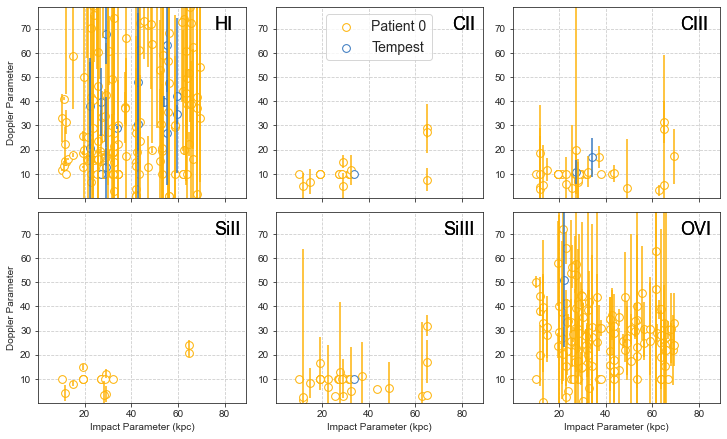

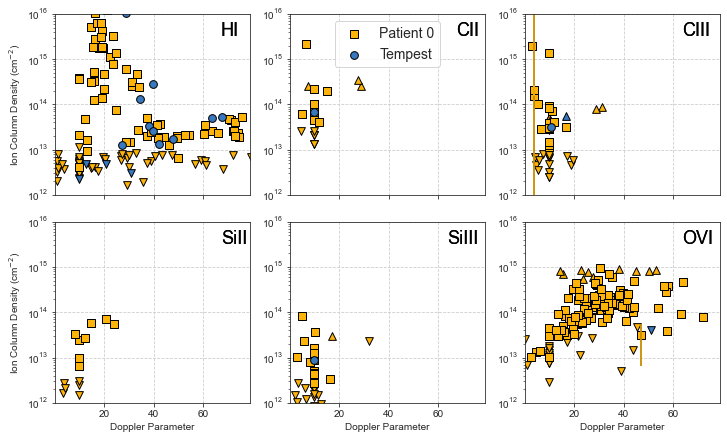

In [9]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'O VI']
#ion_list = ['H I', 'O VI', 'N V']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']


for compare in ['model']:
    for xfield, yfield in zip(xfields, yfields):
        nrows = 2; ncols =3;
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(3.4*ncols, 3.1*nrows), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, compare = compare, \
                                           fig = fig, ax = ax, marker_size = 60, set_ylim = True, fn = fn)

        ax[0][1].legend(loc = 'upper center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)




../../plots/bval_col_ovi_tempest.png


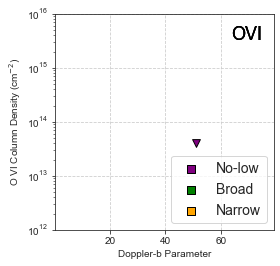

In [13]:
imp.reload(ipd)
imp.reload(pt)
ion_list = ['O VI']

xfield = 'bval'
yfield = 'col'

fn = '../../data/analyzed_spectra/combined_spectra.h5'
model = 'tempest'

nrows = 1; ncols =1;
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(4*ncols, 3.8*nrows), sharex = True, sharey = False)
figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = 'bval', yfield = 'col', nrows = nrows, fn = fn, \
                                        model = model, compare = 'ovi', fig = fig, ax = ax, marker_size = 60, set_ylim = True)

ax.legend(loc = 4,  fontsize = 14, frameon = True)

ax.set_ylabel('O VI Column Density (cm$^{-2}$)')
ax.set_xlabel('Doppler-b Parameter')

fig.tight_layout()
figname = '../../plots/%s_%s_%s_%s.png'%(xfield, yfield, 'ovi', model)
print(figname)
plt.savefig(figname, dpi = 300)


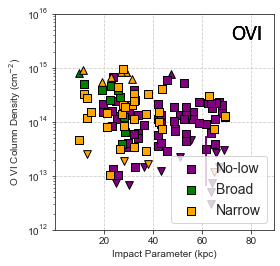

In [14]:
imp.reload(ipd)
imp.reload(pt)
ion_list = ['O VI']

xfield = 'impact'
yfield = 'col'

nrows = 1; ncols =1;
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(4*ncols, 3.8*nrows), sharex = True, sharey = False)
figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, \
                                        compare = 'ovi', fig = fig, ax = ax, marker_size = 60, set_ylim = True)

ax.legend(loc = 4, fontsize = 14, frameon = True)
ax.set_ylabel('O VI Column Density (cm$^{-2}$)')
ax.set_xlabel('Impact Parameter (kpc)')
 
fig.tight_layout()
plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, 'ovi'), dpi = 300)


